In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.applications import VGG16 
from keras.applications import VGG19
from keras.layers import Activation, Dense,Flatten,Dropout
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import TensorBoard
import cv2
import sklearn
from sklearn.metrics import confusion_matrix
import itertools  
import pickle

Using TensorFlow backend.


In [2]:


NAME = "CNN-ph2-transfer-50epoch-2dropsagain-dense5000-20%splits"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

#the path of images on disk
TRAIN_DIR='PH2Dataset/PH2.16/train/'
VALID_DIR='PH2Dataset/PH2.16/valid/'
TEST_DIR='PH2Dataset/PH2.16/test/'
IMAGE_SIZE=200

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

one_hot_labels = keras.utils.to_categorical(y, num_classes=3)

In [3]:
vgg16_model=VGG16(weights='imagenet',include_top=False,input_shape=(200,200,3))

model = Sequential()



In [4]:
for layer in vgg16_model.layers:

    model.add(layer)

In [5]:
for layer in model.layers[:13]:
    layer.trainable = False 
model.add(Dropout(0.25))  
model.add(Flatten())
model.add(Dense(5000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5000, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [6]:

model.compile(loss="categorical_crossentropy",
			  optimizer="adam",
			  metrics=["accuracy"])

#optimizer='sgd'


Train on 144 samples, validate on 36 samples
Epoch 1/50
144/144 [==============================] - 4s 29ms/step - loss: 10.0145 - acc: 0.2153 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 2/50
144/144 [==============================] - 1s 9ms/step - loss: 12.8721 - acc: 0.2014 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 3/50
144/144 [==============================] - 1s 9ms/step - loss: 12.8721 - acc: 0.2014 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 4/50
144/144 [==============================] - 1s 9ms/step - loss: 12.8721 - acc: 0.2014 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 5/50
144/144 [==============================] - 1s 10ms/step - loss: 12.8721 - acc: 0.2014 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 6/50
144/144 [==============================] - 1s 10ms/step - loss: 12.8721 - acc: 0.2014 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 7/50
144/144 [==============================] - 1s 10ms/step - loss: 12.8721 - acc: 0.2014 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 8/50
14

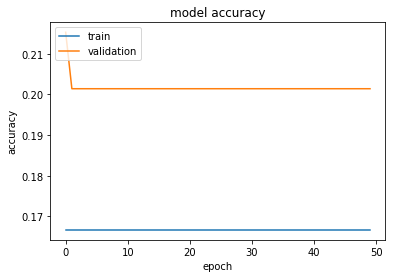

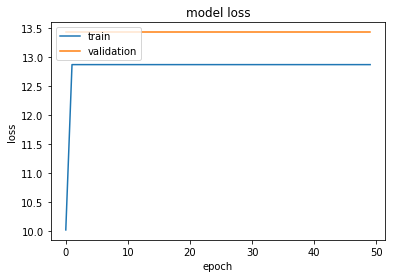

In [7]:
history=model.fit(X, one_hot_labels, batch_size=32, epochs=50, validation_split=0.2,callbacks=[tensorboard])
#epochs=5,verbose=2

# list all data in history
print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
score, acc=model.evaluate(valid_batches,steps=2)
print(score)
print(acc)

0.4000000134110451

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

confusion matrix, without Normalization
[[3 0]
 [2 0]]


IndexError: tuple index out of range

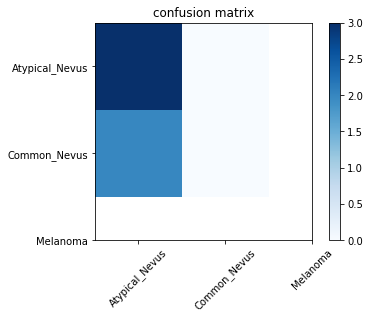